# Predict Delivery time using sorting time 
    Build a simple linear regression model by performing EDA and do necessary transformations and select the best model.

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf

# Importing Data

In [2]:
data = pd.read_csv('delivery_time.csv')
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data.columns =['Delivery_Time','Sorting_Time']

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


# Linearity Check

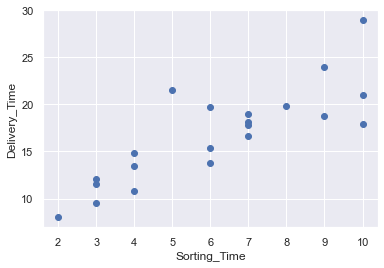

In [41]:
plt.scatter(data['Sorting_Time'],data['Delivery_Time'])
plt.xlabel('Sorting_Time')
plt.ylabel('Delivery_Time')
plt.show()

# Creating Linear Regression Model

In [6]:
model = smf.ols('Delivery_Time ~ Sorting_Time',data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        09:19:42   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Predictions

In [7]:
inputs = pd.DataFrame(data['Sorting_Time'])

In [8]:
predictions = model.predict(inputs)
predictions = pd.DataFrame(predictions, columns = ['Predictions'])
predictions.head()

,Predictions
0,23.072933
1,13.178814
2,16.476853
3,21.423913
4,23.072933


In [9]:
predictions['targets'] = data['Delivery_Time']
predictions['Residuals'] = predictions['targets'] - predictions['Predictions']
predictions.head()

,Predictions,targets,Residuals
0,23.072933,21.00,-2.072933
1,13.178814,13.50,0.321186
2,16.476853,19.75,3.273147
3,21.423913,24.00,2.576087
4,23.072933,29.00,5.927067


# Normality of Residuals Check

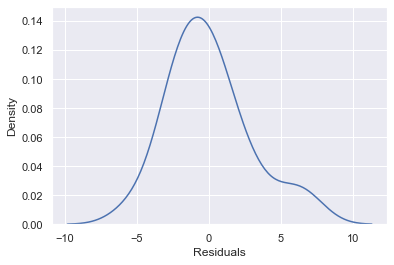

In [10]:
sns.kdeplot(predictions['Residuals'])
plt.show()

# Homoscedasticity Check

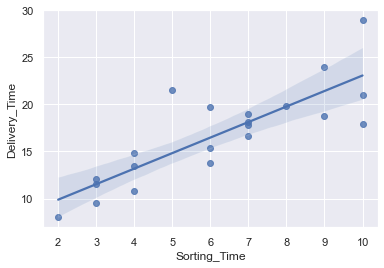

In [11]:
sns.regplot(x = data['Sorting_Time'], y = data['Delivery_Time'], data = data)
plt.show()

# No Auto-Correlation

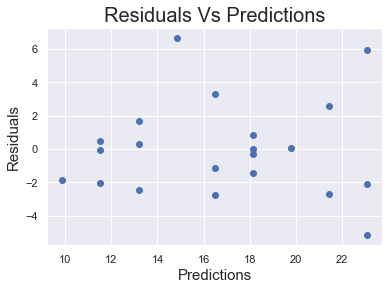

In [12]:
plt.scatter(x = predictions['Predictions'],y = predictions['Residuals'])
plt.title('Residuals Vs Predictions',fontsize = 20)
plt.xlabel('Predictions',fontsize = 15)
plt.ylabel('Residuals',fontsize = 15)
plt.show()

# Semi Log Transformation 1

In [39]:
semi_log_data1 = {'Log_Delivery_Time': np.log(data['Delivery_Time']),
                  'Sorting_Time'     : data['Sorting_Time']
           }
semi_log_data1 = pd.DataFrame(semi_log_data1)

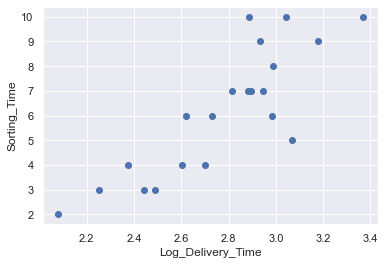

In [38]:
plt.scatter(x = semi_log_data1['Log_Delivery_Time'], y= semi_log_data1['Sorting_Time'])
plt.xlabel('Log_Delivery_Time')
plt.ylabel('Sorting_Time')
plt.show()

In [24]:
semilog_model = smf.ols('Log_Delivery_Time ~ Sorting_Time',data = semi_log_data1).fit()
semilog_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Log_Delivery_Time   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     46.73
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           1.59e-06
Time:                        09:30:48   Log-Likelihood:                 7.7920
No. Observations:                  21   AIC:                            -11.58
Df Residuals:                      19   BIC:                            -9.495
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_Time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Semi Log Transformation 2

In [37]:
semi_log_data2 = {'Delivery_Time'     : data['Delivery_Time'],
                  'Log_Sorting_Time'  : np.log(data['Sorting_Time'])
           }
semi_log_data2 = pd.DataFrame(semi_log_data2)

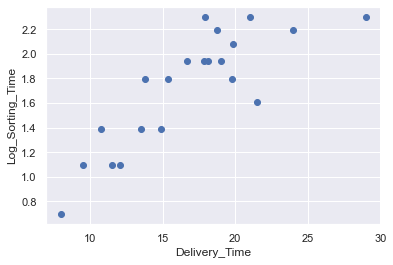

In [36]:
plt.scatter(x = semi_log_data2['Delivery_Time'], y= semi_log_data2['Log_Sorting_Time'])
plt.xlabel('Delivery_Time')
plt.ylabel('Log_Sorting_Time')
plt.show()

In [27]:
semilog_mode2 = smf.ols('Delivery_Time ~ Log_Sorting_Time',data = semi_log_data2).fit()
semilog_mode2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           2.64e-06
Time:                        09:33:42   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
Log_Sorting_Time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Log-Transformation

In [31]:
log_data = {'Log_Delivery_Time': np.log(data['Delivery_Time']),
            'Log_Sorting_Time' : np.log(data['Sorting_Time'])
           }
log_data = pd.DataFrame(log_data)

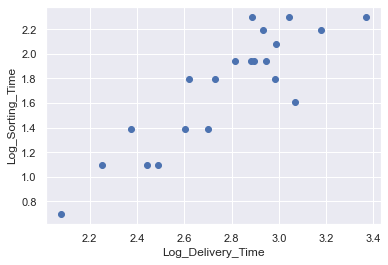

In [34]:
plt.scatter(x = log_data['Log_Delivery_Time'], y= log_data['Log_Sorting_Time'])
plt.xlabel('Log_Delivery_Time')
plt.ylabel('Log_Sorting_Time')
plt.show()

In [15]:
log_model = smf.ols('Log_Delivery_Time~Log_Sorting_Time',data = log_data).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Log_Delivery_Time   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           1.60e-07
Time:                        09:19:43   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7420      0.133     13.086      0.000       1.463       2.021
Log_Sorting_Time     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Square Root Transformation

In [32]:
sqrt_data = {'sqrt_Delivery_Time': np.sqrt(data['Delivery_Time']),
            'Sorting_Time' : data['Sorting_Time']
           }
sqrt_data = pd.DataFrame(sqrt_data)

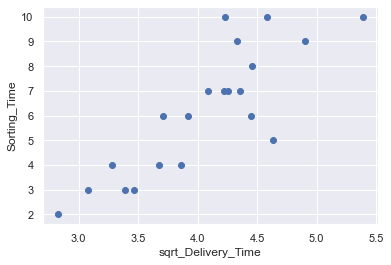

In [35]:
plt.scatter(x = sqrt_data['sqrt_Delivery_Time'], y= sqrt_data['Sorting_Time'])
plt.xlabel('sqrt_Delivery_Time')
plt.ylabel('Sorting_Time')
plt.show()

In [30]:
sqrt_model = smf.ols('sqrt_Delivery_Time ~ Sorting_Time',data = sqrt_data).fit()
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     sqrt_Delivery_Time   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     45.20
Date:                Tue, 30 Aug 2022   Prob (F-statistic):           2.00e-06
Time:                        09:37:35   Log-Likelihood:                -6.6646
No. Observations:                  21   AIC:                             17.33
Df Residuals:                      19   BIC:                             19.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7727      0.205     13.527      0.000       2.344       3.202
Sorting_Time     0.2066      0.031      6.723      0.000       0.142       0.271
==============================================================================
Omnibus:                        2.228   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.328   Jarque-Bera (JB):                1.195
Skew:                           0.580   Prob(JB):                        0.550
Kurtosis:                       3.142   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model with Log Transformation is the Best Fit Model for this Data.